<a href="https://colab.research.google.com/github/Thanmai01/ML_Models/blob/main/Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
x,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [3]:
x.shape

(1000, 2)

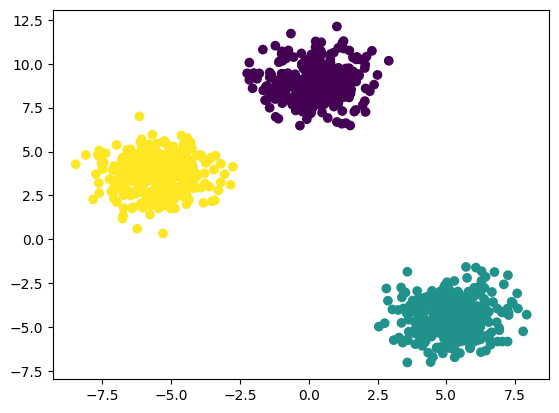

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [8]:
from sklearn.cluster import KMeans

In [9]:
## elbow or manual method to select K value

In [15]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init = 'k-means++')
  kmeans.fit(x_train)
  wcss.append(kmeans.inertia_)

In [16]:
wcss

[34827.576825520235,
 7935.437286145425,
 1319.2730531585605,
 1140.4677884655134,
 1035.3275785606083,
 853.2558345247515,
 755.1413980337915,
 670.5730479240511,
 629.396983295067,
 547.1694914348551]

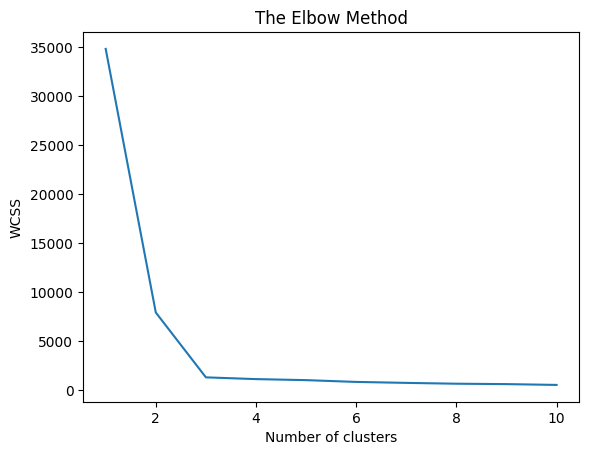

In [17]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans=KMeans(n_clusters=3, init = 'k-means++')

In [19]:
kmeans.fit_predict

<bound method _BaseKMeans.fit_predict of KMeans(n_clusters=3)>

In [24]:
ylabels=kmeans.fit_predict(x_train)
ytest_label=kmeans.predict(x_train)

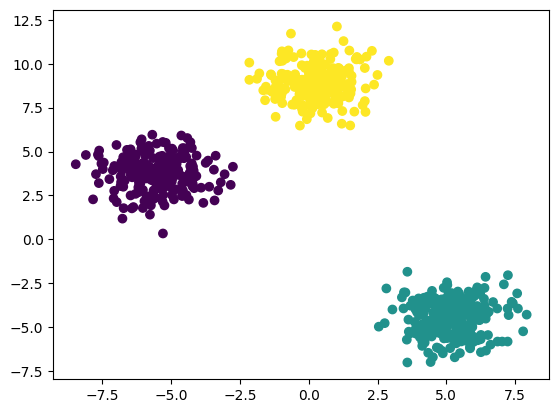

In [22]:
plt.scatter(x_train[:,0],x_train[:,1],c=ylabels)

In [27]:
!pip install kneed

In [28]:
from kneed import KneeLocator
knee_locator=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
knee_locator.elbow

np.int64(3)

In [30]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(x_train)
  score=silhouette_score(x_train,kmeans.labels_)
  silhouette_coefficients.append(score)

In [31]:
silhouette_coefficients

[np.float64(0.7281443868598331),
 np.float64(0.8071181203797672),
 np.float64(0.6357733426488265),
 np.float64(0.5051067773755158),
 np.float64(0.3229363297373123),
 np.float64(0.323618907030455),
 np.float64(0.3363469721707819),
 np.float64(0.33220550181308617),
 np.float64(0.32683692079597704)]

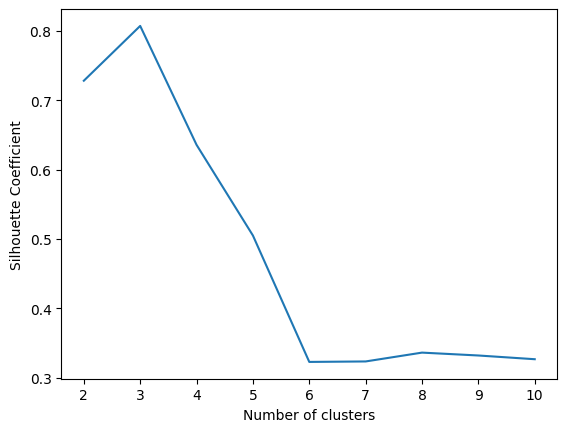

In [32]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()